## Relaxation in AST experiment

Look into the velocity fields and tracer fields from 03_relax_base and 02_AST03_No_Cny runs in experiment REV_10TR_RELAX_AST

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import matplotlib.gridspec as gspec

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [4]:
gridAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/03_relax_base/gridGlob.nc')
stAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/03_relax_base/stateGlob.nc')
trAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/03_relax_base/ptracersGlob.nc')

gridNoC = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/04_relax_base_noc/gridGlob.nc')
stNoC = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/04_relax_base_noc/stateGlob.nc')
trNoC = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/04_relax_base_noc/ptracersGlob.nc')

gridUpw = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc')
stUpw = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc')
trUpw = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/ptracersGlob.nc')

## U

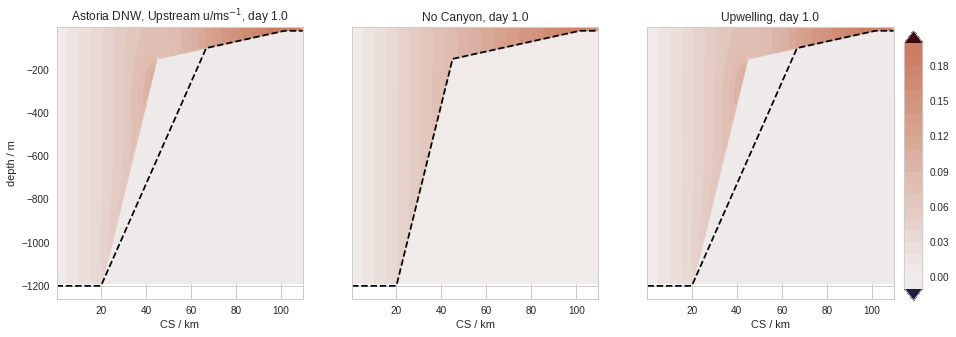

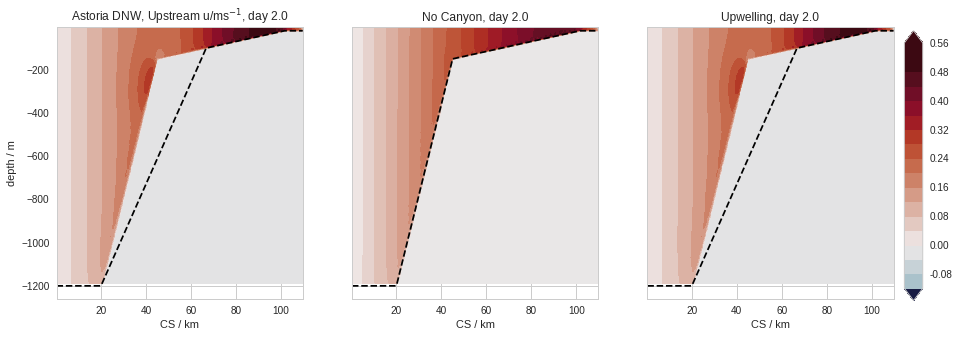

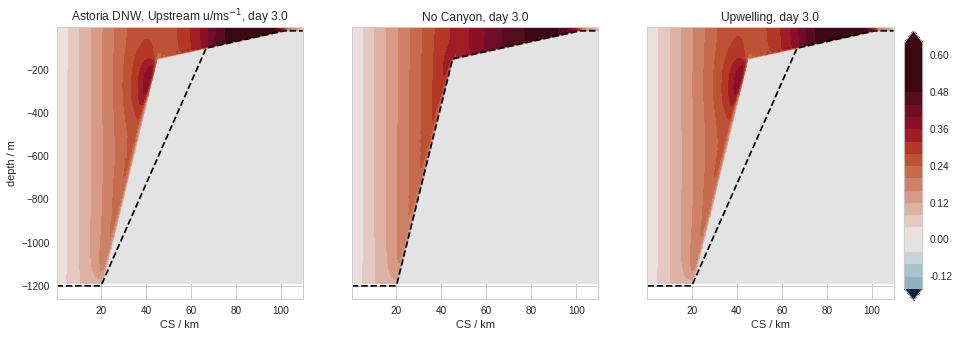

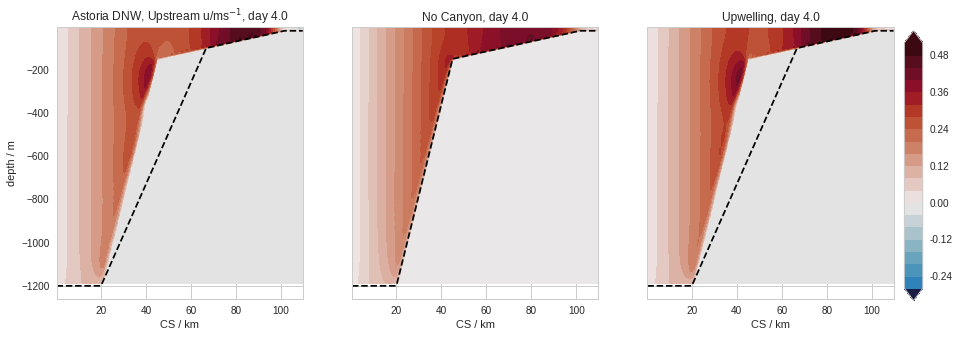

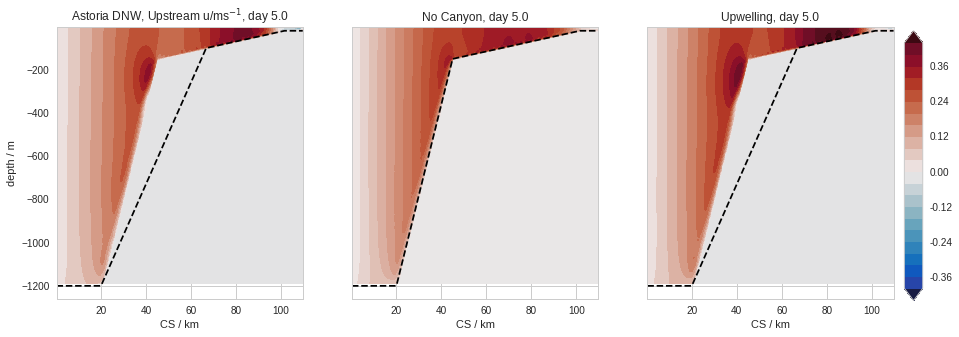

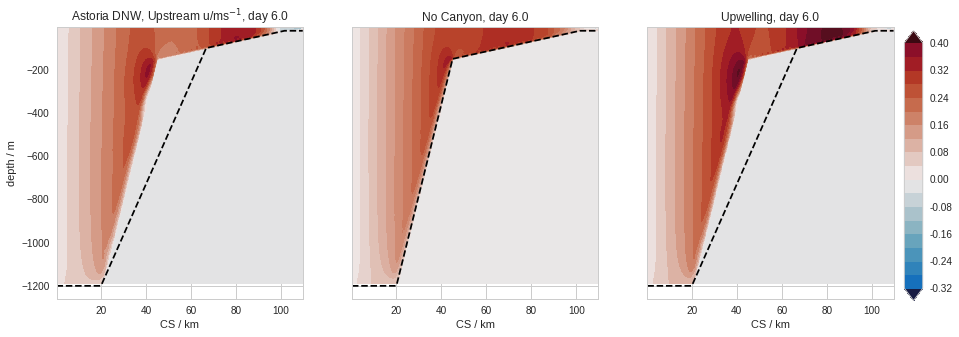

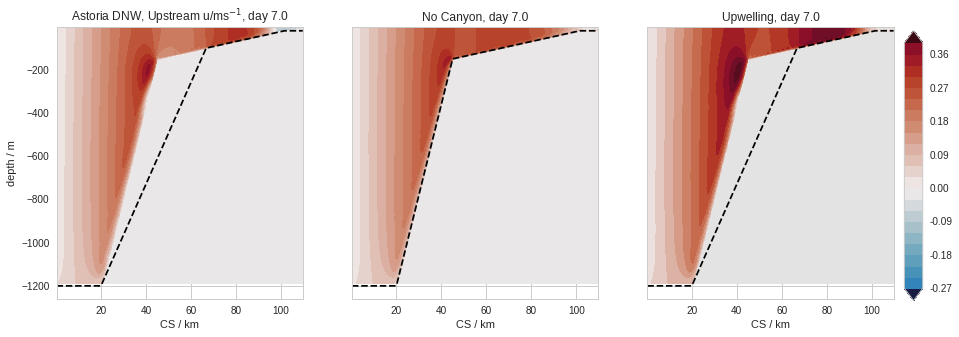

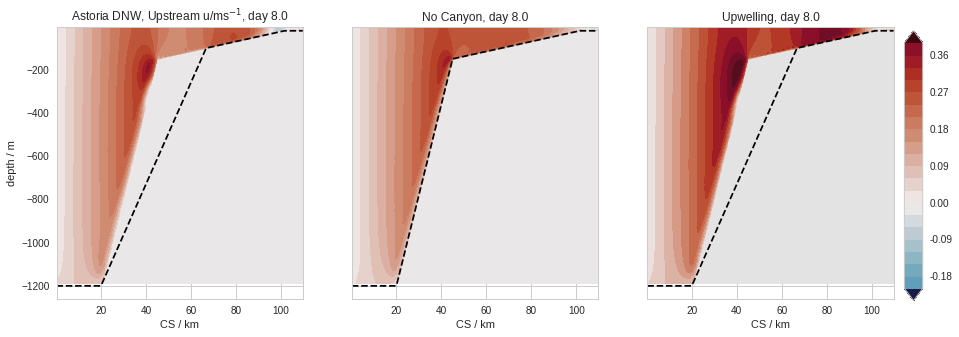

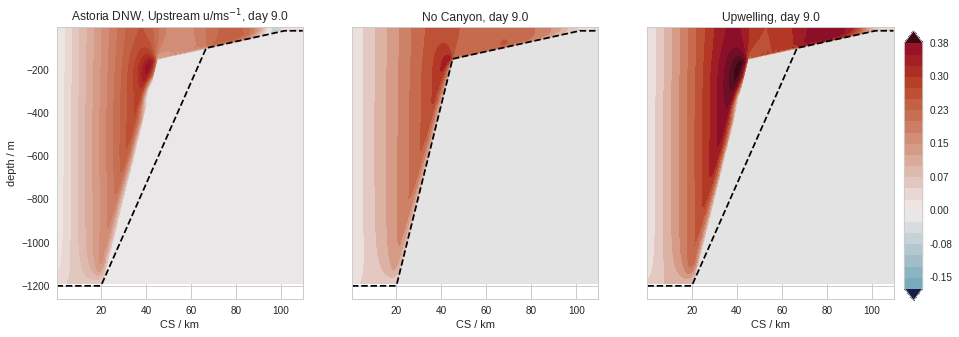

In [5]:
xind = 110
yslice = slice(0,360)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    UAst = stAst.U.isel(T=tt,Xp1=xind,Y=yslice)
    UNoC = stNoC.U.isel(T=tt,Xp1=xind,Y=yslice)
    UUpw = stUpw.U.isel(T=tt,Xp1=xind,Y=yslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
    ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('CS / km')
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridNoC.Y[yslice]/1000, gridNoC.RC, UNoC,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax1.plot(gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,180],'k--')
    ax1.set_xlabel('CS / km')
    
    ax2.contourf(gridUpw.Y[yslice]/1000, gridUpw.RC, UUpw,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax2.plot(gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,180],'k--')
    ax2.set_xlabel('CS / km')
    
    ax0.set_title(r'Astoria DNW, Upstream u/ms$^{-1}$, day %1.1f' %(tt/2))
    ax1.set_title(r'No Canyon, day %1.1f' %(tt/2))
    ax2.set_title(r'Upwelling, day %1.1f' %(tt/2))

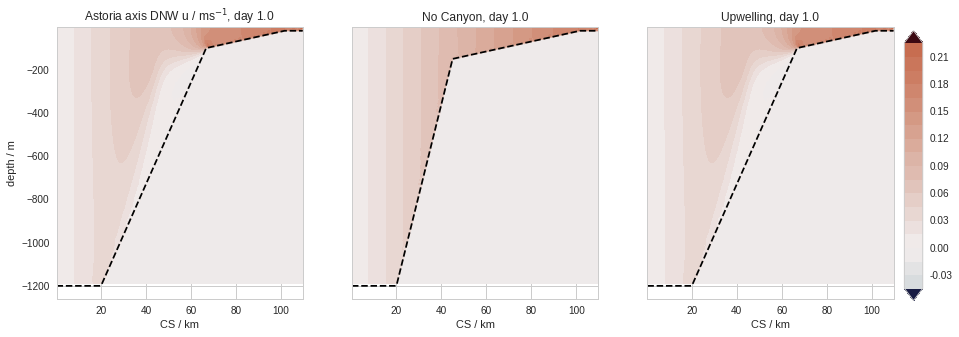

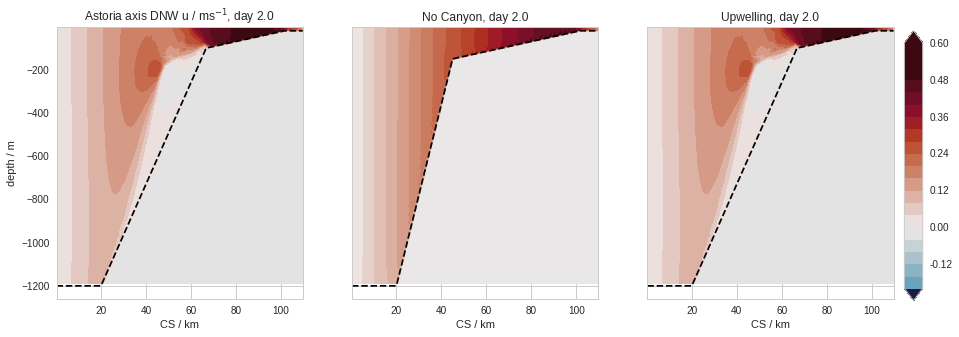

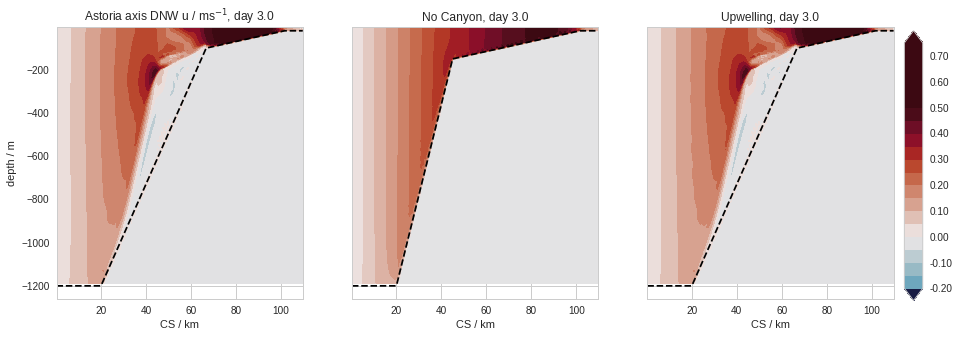

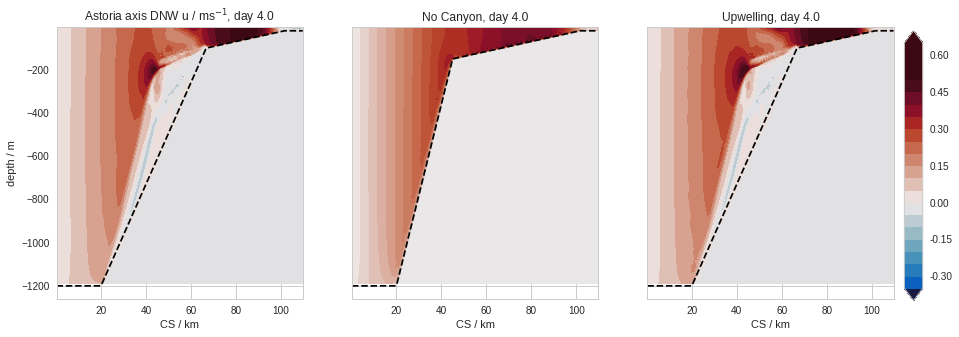

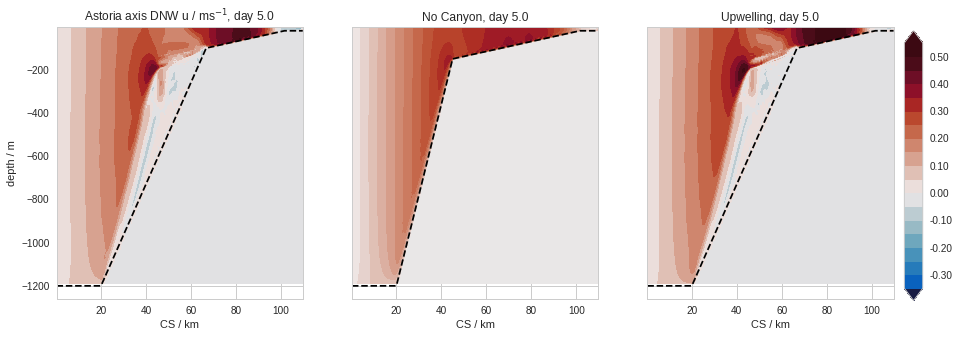

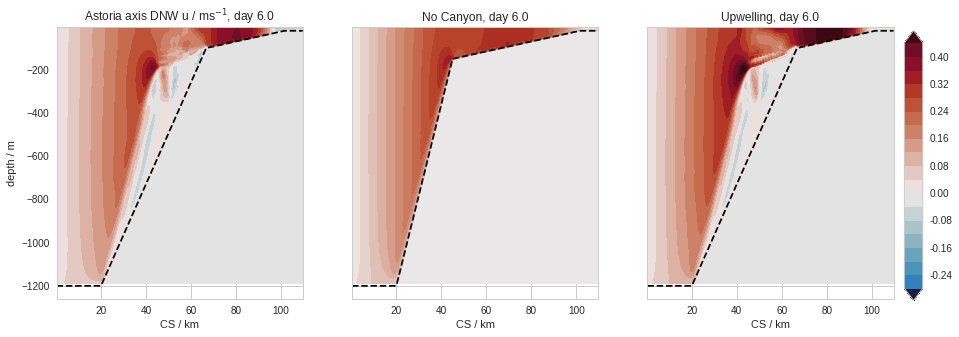

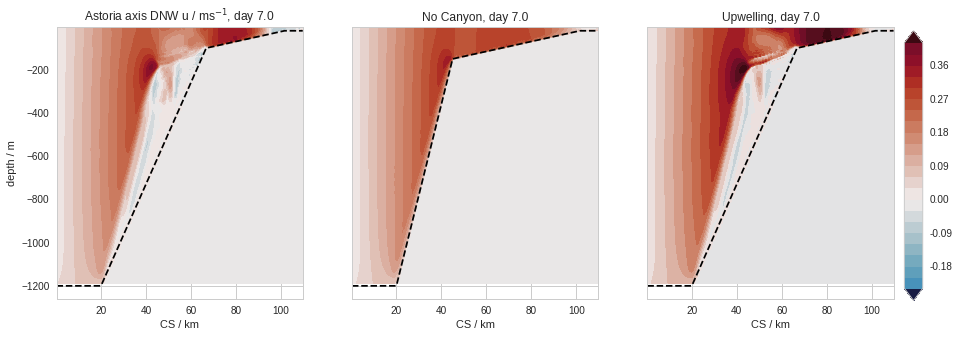

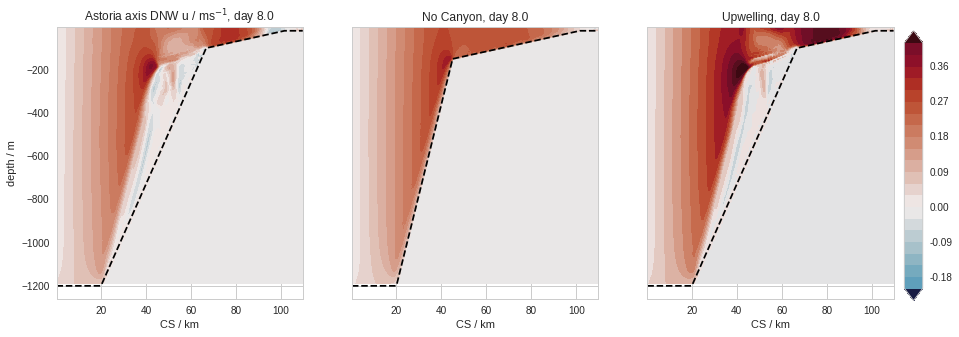

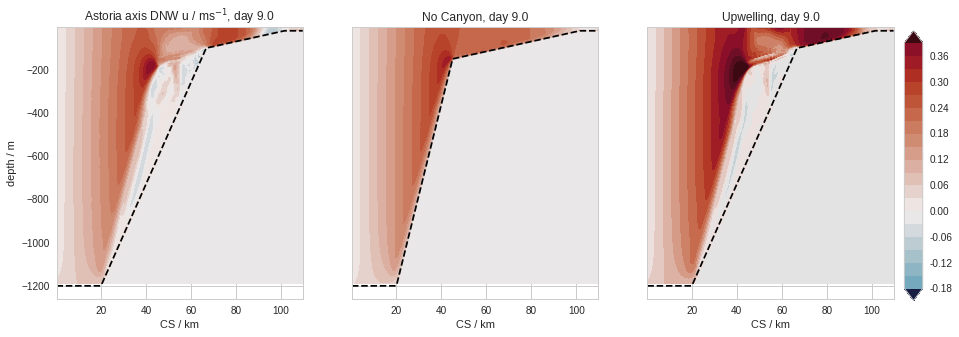

In [6]:
xind = 180
yslice = slice(0,360)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    UAst = stAst.U.isel(T=tt,Xp1=xind,Y=yslice)
    UNoC = stNoC.U.isel(T=tt,Xp1=xind,Y=yslice)
    UUpw = stUpw.U.isel(T=tt,Xp1=xind,Y=yslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
    ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('CS / km')
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridNoC.Y[yslice]/1000, gridNoC.RC, UNoC,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax1.plot(gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,180],'k--')
    ax1.set_xlabel('CS / km')
    
    ax2.contourf(gridUpw.Y[yslice]/1000, gridUpw.RC, UUpw,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax2.plot(gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,180],'k--')
    ax2.set_xlabel('CS / km')
    
    ax0.set_title(r'Astoria axis DNW u / ms$^{-1}$, day %1.1f' %(tt/2))
    ax1.set_title(r'No Canyon, day %1.1f' %(tt/2))
    ax2.set_title(r'Upwelling, day %1.1f' %(tt/2))

Text(0.5,1,'Upwelling, advective phase mean')

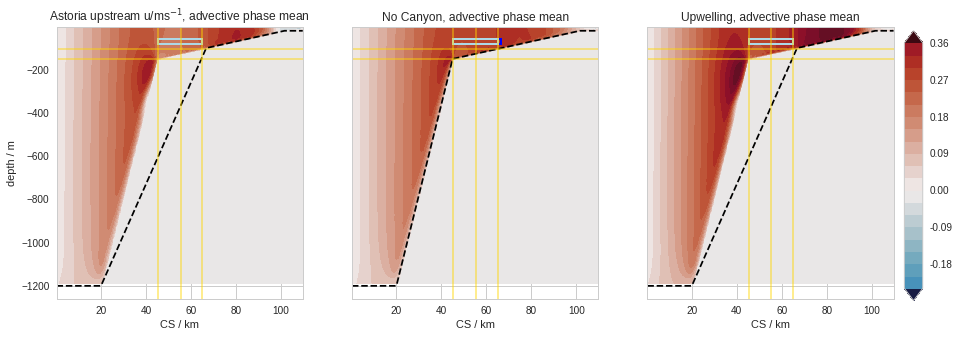

In [7]:
xind = 100
yslice = slice(0,360)
tslice = slice(8,20)
    
UAst = (stAst.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UNoC = (stNoC.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UUpw = (stUpw.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')

fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                    cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('CS / km')
ax0.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[20],color='gold',alpha=0.5)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')
rect = pat.Rectangle((gridAst.Y[130]/1000,gridAst.RC[16]),
                     (gridAst.Y[230]-gridAst.Y[130])/1000,
                     (gridAst.RC[16]-gridAst.RC[21]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax0.add_patch(rect)

ax1.contourf(gridNoC.Y[yslice]/1000, gridNoC.RC, UNoC,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax1.plot(gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,180],'k--')
ax1.set_xlabel('CS / km')
ax1.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax1.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax1.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax1.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax1.axhline(gridAst.RC[20],color='gold',alpha=0.5)
rect = pat.Rectangle((gridNoC.Y[130]/1000,gridNoC.RC[16]),
                     (gridNoC.Y[236]-gridNoC.Y[130])/1000,
                     (gridNoC.RC[16]-gridNoC.RC[21]),
                     linewidth=2,edgecolor='blue',facecolor='none')
ax1.add_patch(rect)

rect = pat.Rectangle((gridNoC.Y[130]/1000,gridNoC.RC[16]),
                     (gridNoC.Y[230]-gridNoC.Y[130])/1000,
                     (gridNoC.RC[16]-gridNoC.RC[21]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax1.add_patch(rect)

ax2.contourf(gridUpw.Y[yslice]/1000, gridUpw.RC, UUpw,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax2.plot(gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,180],'k--')
ax2.set_xlabel('CS / km')
ax2.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax2.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax2.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax2.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax2.axhline(gridAst.RC[20],color='gold',alpha=0.5)

rect = pat.Rectangle((gridUpw.Y[130]/1000,gridUpw.RC[16]),
                     (gridUpw.Y[230]-gridUpw.Y[130])/1000,
                     (gridUpw.RC[16]-gridUpw.RC[21]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax2.add_patch(rect)
   
ax0.set_title('Astoria upstream u/ms$^{-1}$, advective phase mean' )
ax1.set_title('No Canyon, advective phase mean')
ax2.set_title('Upwelling, advective phase mean' )

### incoming U

* Alongshore velocity upstream of the canyon and along canyon length, above bbl. 
* Averaged over a box of length approximately L and height 20 m (4 z-levels).

Indices for each bathymentry:

Astoria03: CS (130, 230); Z (12,16) 

Astoria03: CS (130, 160); Z (32,28) 

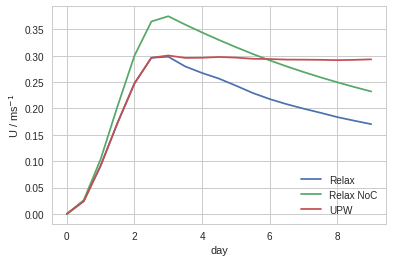

In [9]:
xind = 100

yslice_A = slice(130,230)
zslice_A = slice(12,16)

yslice_B = slice(130,230)
zslice_B = slice(12,16)

yslice_C = slice(130,230)
zslice_C = slice(12,16)


UAst = ((stAst.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UNoC = ((stNoC.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UUpw = ((stUpw.U.isel(Z=zslice_C,Xp1=xind,Y=yslice_C)).mean(dim='Z')).mean(dim='Y')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4))

ax0.plot(np.arange(19)/2.,UAst, label='Relax')
ax0.plot(np.arange(19)/2.,UNoC, label='Relax NoC')
ax0.plot(np.arange(19)/2.,UUpw, label='UPW')

ax0.set_ylabel( 'U / ms$^{-1}$')
ax0.set_xlabel('day')
ax0.legend(loc=0)

## V

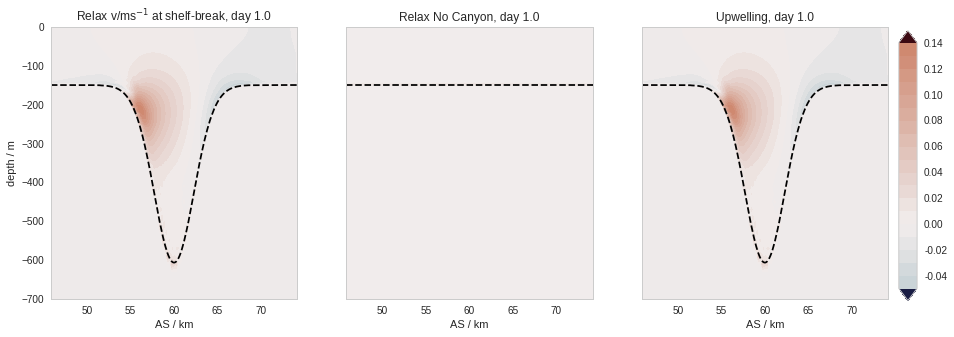

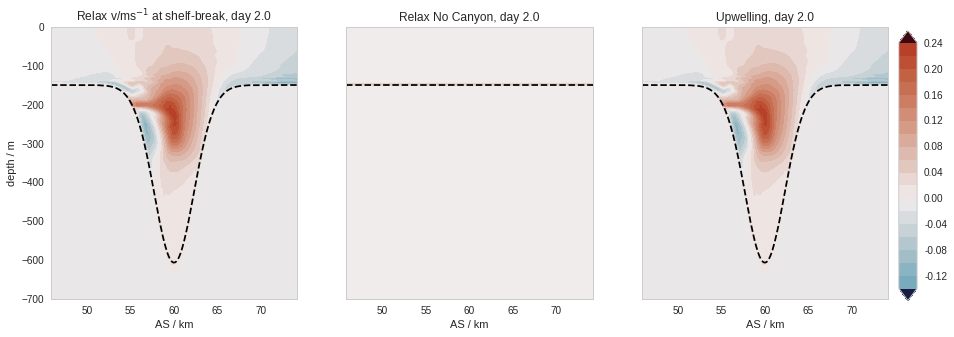

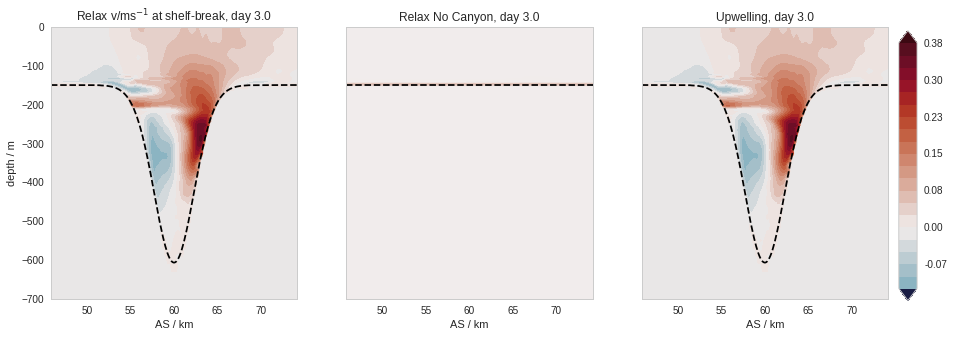

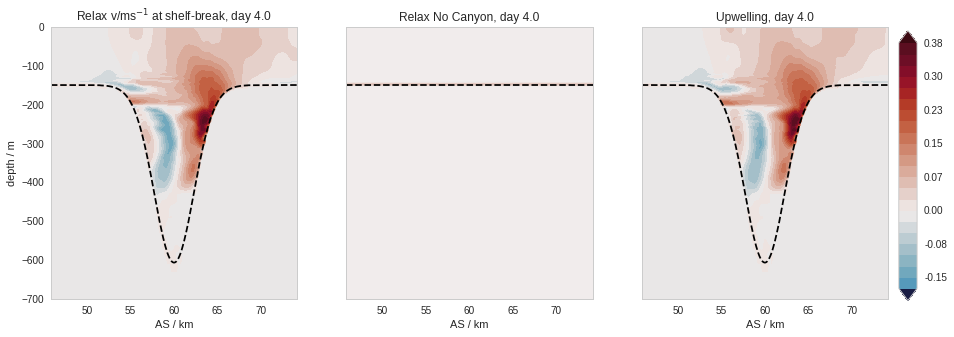

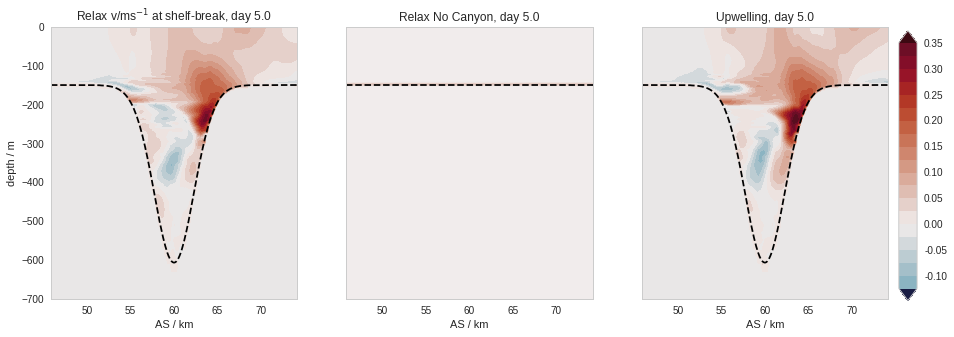

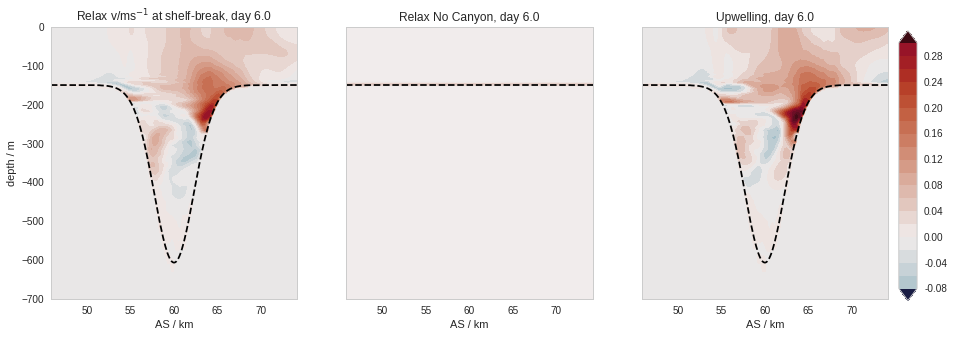

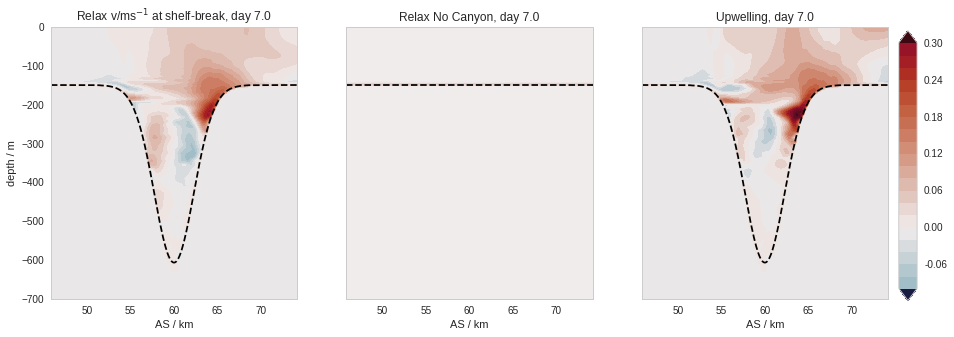

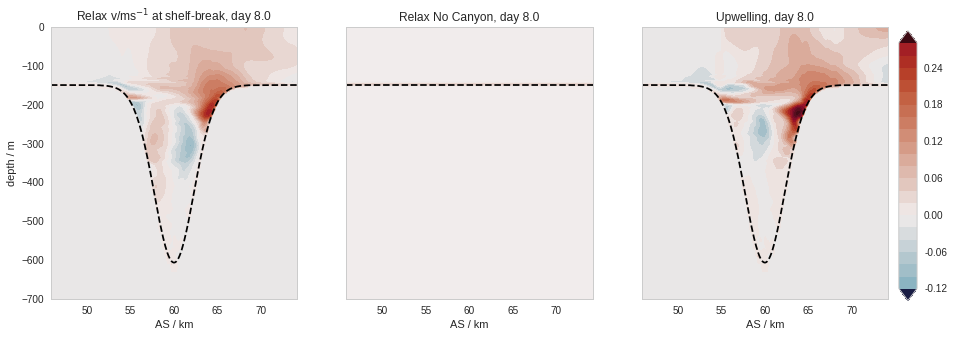

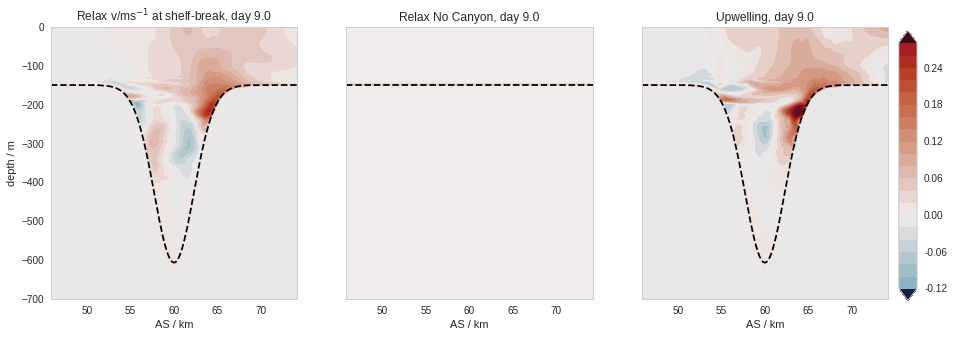

In [10]:
yind_Ast = 130
yind_NoC = 130
yind_Upw = 130

xslice = slice(100,260)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    VAst = stAst.V.isel(T=tt,Yp1=yind_Ast,X=xslice)
    VNoC = stNoC.V.isel(T=tt,Yp1=yind_NoC,X=xslice)
    VUpw = stUpw.V.isel(T=tt,Yp1=yind_Upw,X=xslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
    ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_ylim(-700,0)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.RC, VNoC,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax1.plot(gridNoC.X[xslice]/1000, -gridNoC.Depth[yind_NoC,xslice],'k--')
    ax1.set_xlabel('AS / km')
    ax1.set_ylim(-700,0)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.RC, VUpw,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax2.plot(gridUpw.X[xslice]/1000, -gridUpw.Depth[yind_Upw,xslice],'k--')
    ax2.set_xlabel('AS / km')
    ax2.set_ylim(-700,0)
    
    ax0.set_title(r'Relax v/ms$^{-1}$ at shelf-break, day %1.1f' %(tt/2))
    ax1.set_title('Relax No Canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

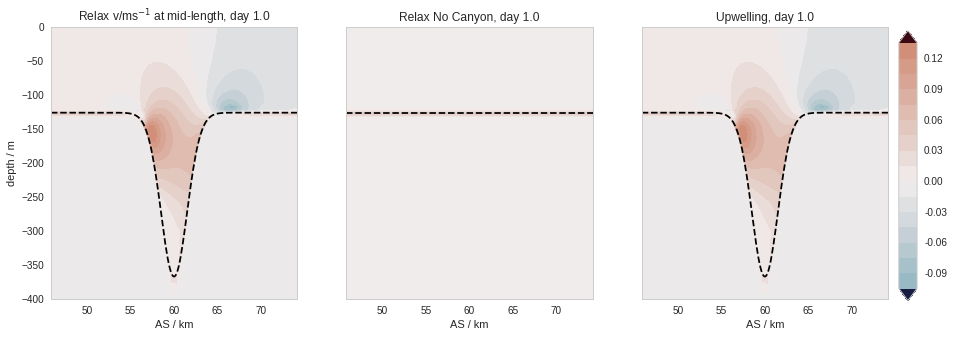

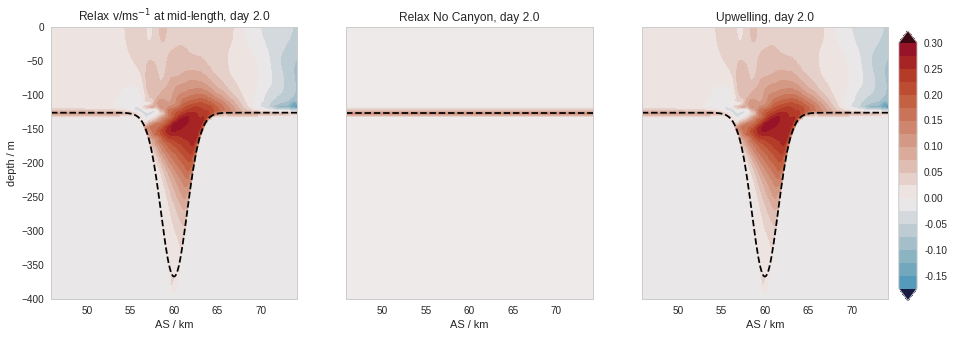

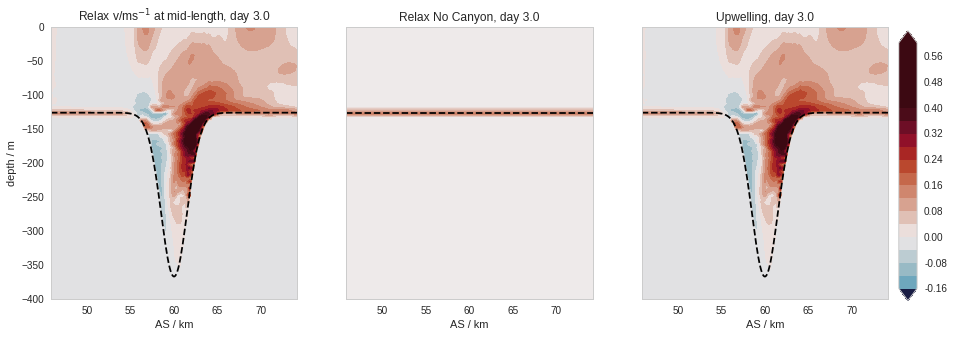

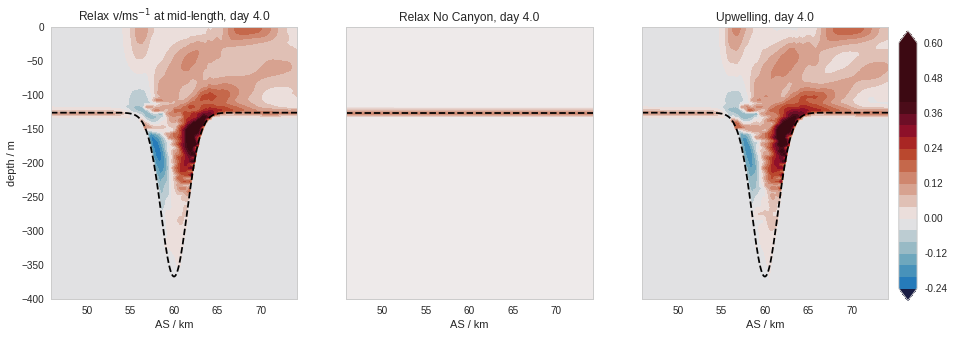

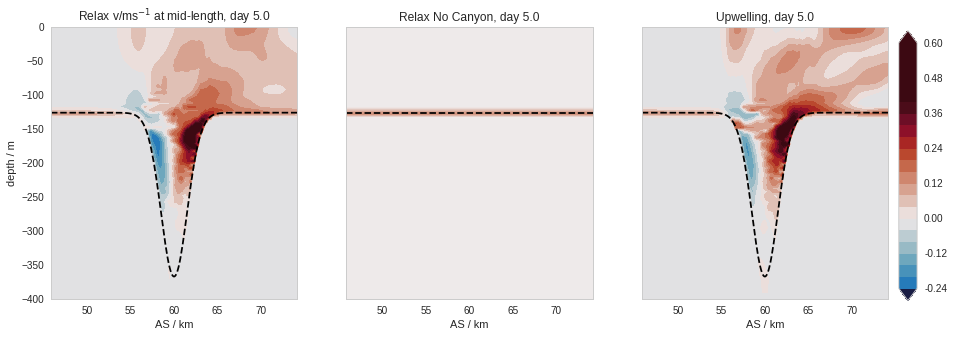

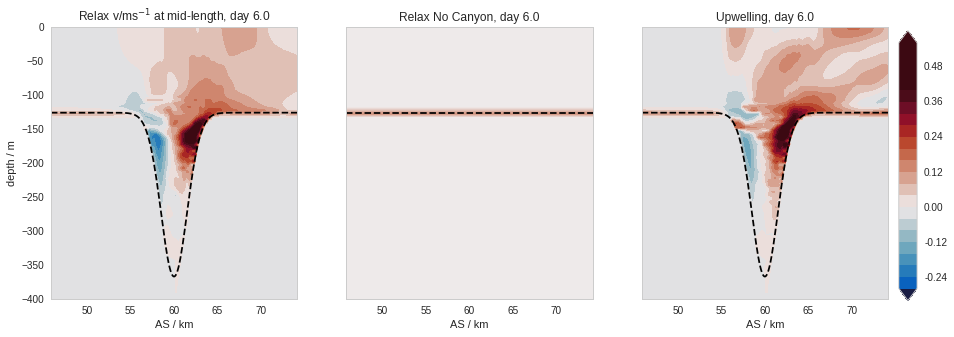

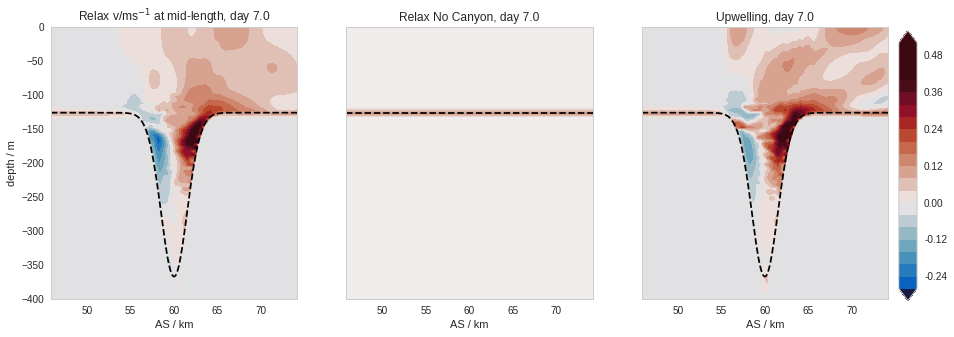

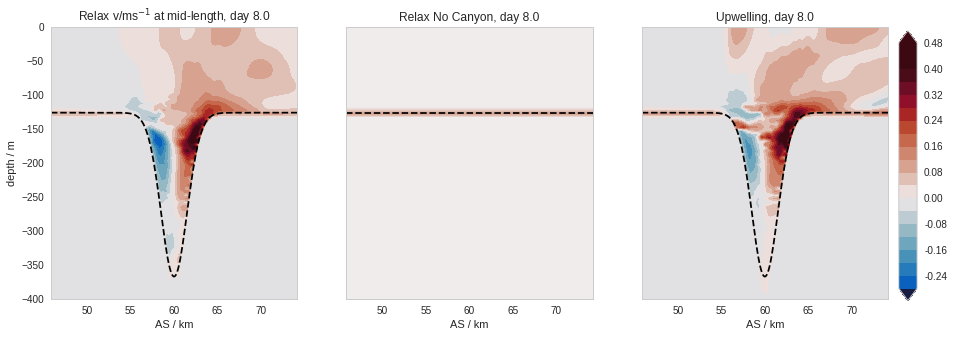

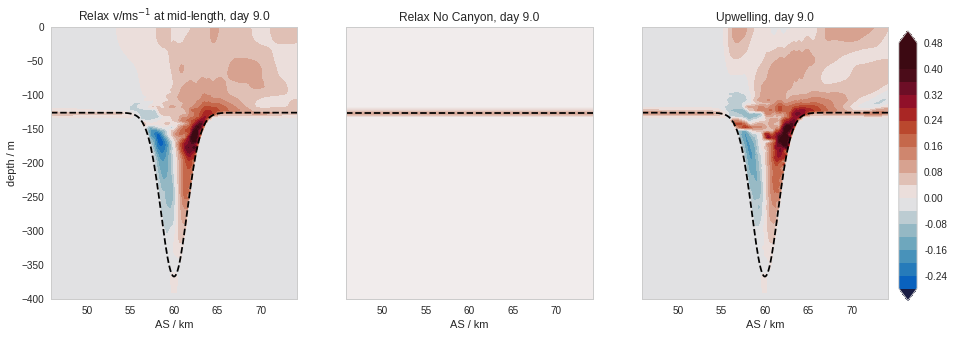

In [11]:
yind_Ast = 182
yind_NoC = 182
yind_Upw = 182

xslice = slice(100,260)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    VAst = stAst.V.isel(T=tt,Yp1=yind_Ast,X=xslice)
    VNoC = stNoC.V.isel(T=tt,Yp1=yind_NoC,X=xslice)
    VUpw = stUpw.V.isel(T=tt,Yp1=yind_Upw,X=xslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20, 
                 cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
    ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_ylim(-400,0)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.RC, VNoC,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax1.plot(gridNoC.X[xslice]/1000, -gridNoC.Depth[yind_NoC,xslice],'k--')
    ax1.set_xlabel('AS / km')
    ax1.set_ylim(-400,0)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.RC, VUpw,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax2.plot(gridUpw.X[xslice]/1000, -gridUpw.Depth[yind_Upw,xslice],'k--')
    ax2.set_xlabel('AS / km')
    ax2.set_ylim(-400,0)
    
    ax0.set_title(r'Relax v/ms$^{-1}$ at mid-length, day %1.1f' %(tt/2))
    ax1.set_title('Relax No Canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

Text(0.5,1,'Upwelling')

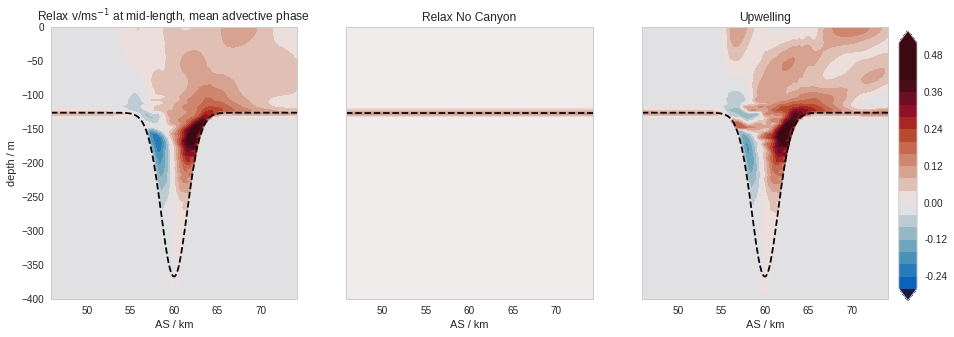

In [12]:
yind_Ast = 182
yind_NoC = 182
yind_Upw = 182

xslice = slice(100,260)
tslice = slice(8,20)

VAst = (stAst.V.isel(T=tslice,Yp1=yind_Ast,X=xslice)).mean(dim='T')
VNoC = (stNoC.V.isel(T=tslice,Yp1=yind_NoC,X=xslice)).mean(dim='T')
VUpw = (stUpw.V.isel(T=tslice,Yp1=yind_Upw,X=xslice)).mean(dim='T')

fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20,
                    cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('AS / km')
ax0.set_ylim(-400,0)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.RC, VNoC,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
ax1.plot(gridNoC.X[xslice]/1000, -gridNoC.Depth[yind_NoC,xslice],'k--')
ax1.set_xlabel('AS / km')
ax1.set_ylim(-400,0)

ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.RC, VUpw,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
ax2.plot(gridUpw.X[xslice]/1000, -gridUpw.Depth[yind_Upw,xslice],'k--')
ax2.set_xlabel('AS / km')
ax2.set_ylim(-400,0)

ax0.set_title('Relax v/ms$^{-1}$ at mid-length, mean advective phase')
ax1.set_title('Relax No Canyon')
ax2.set_title('Upwelling' )

## W


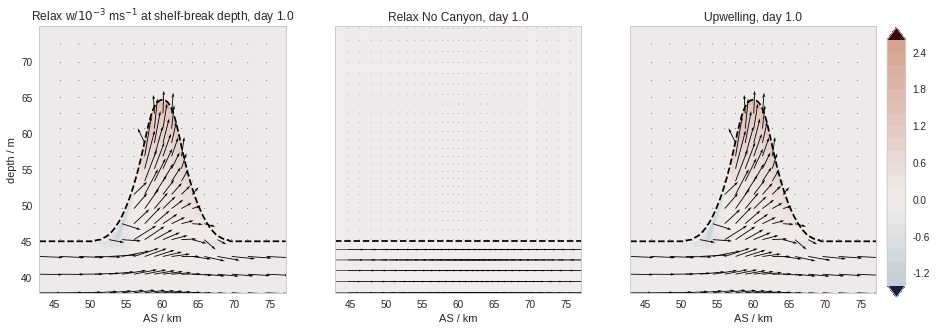

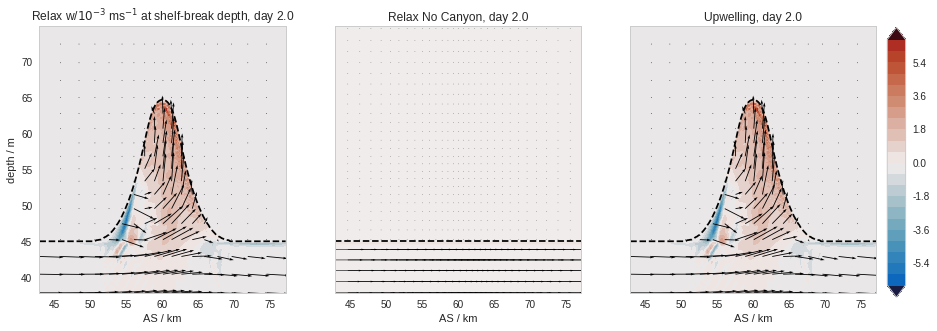

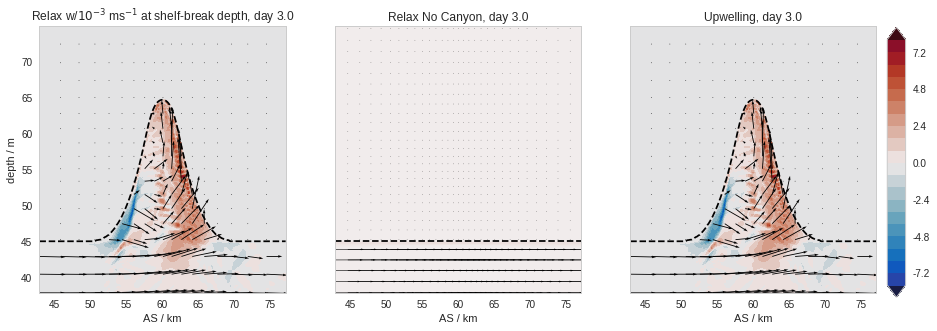

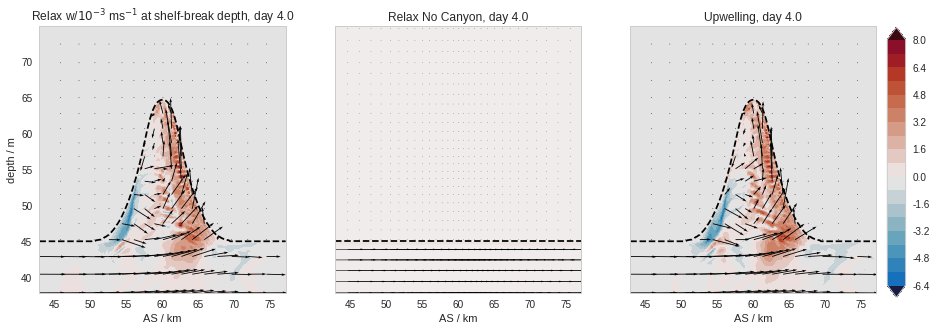

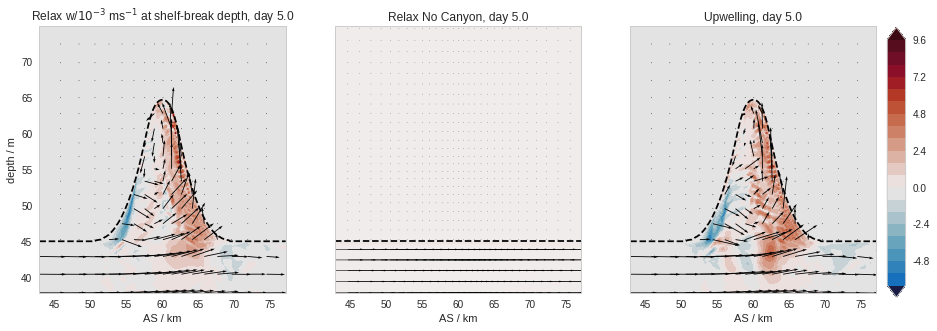

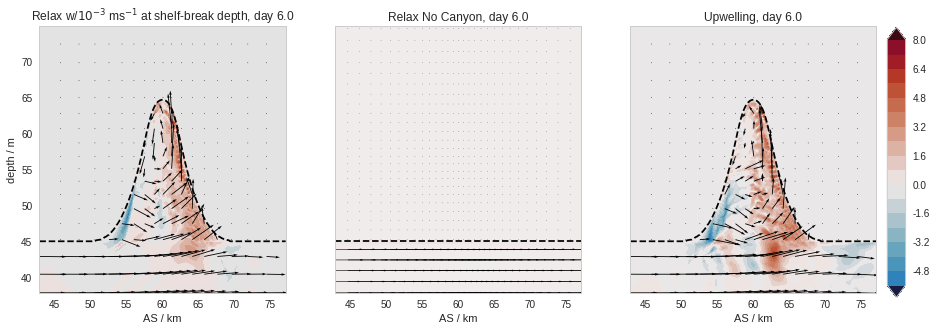

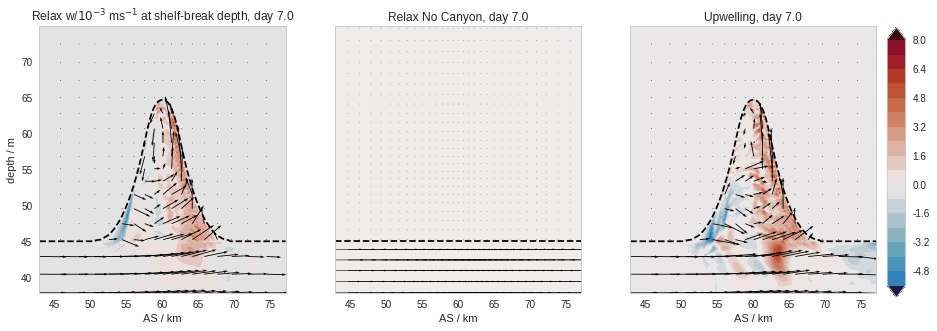

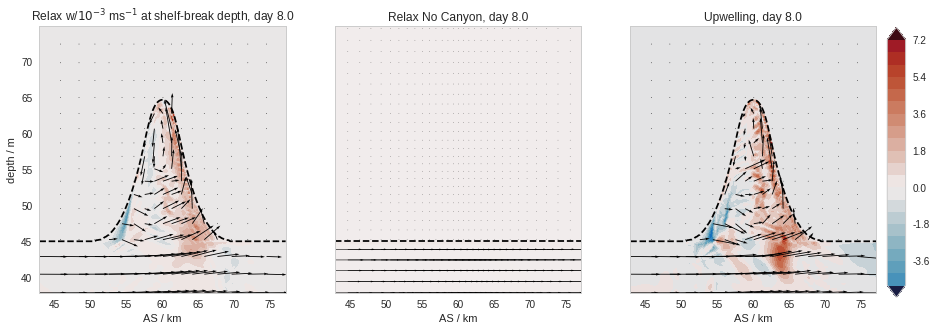

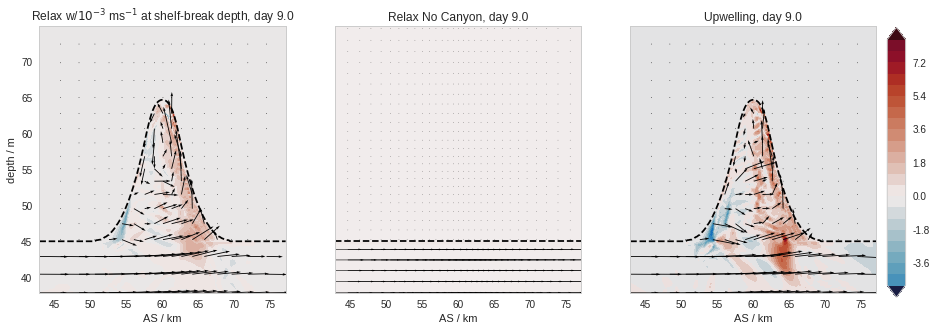

In [16]:
zind_Ast = 30
zind_NoC = 30
zind_Upw = 30

xslice = slice(90,270)
yslice = slice(100,270)

xslice_uns = slice(90,271)
yslice_uns = slice(100,271)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WNoC = stNoC.W.isel(T=tt,Zl=zind_NoC,Y=yslice,X=xslice)
    WUpw = stUpw.W.isel(T=tt,Zl=zind_Upw,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stNoC.U.isel(T=tt,Z=zind_NoC,Y=yslice,Xp1=xslice_uns)
    U3 = stUpw.U.isel(T=tt,Z=zind_Upw,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stNoC.V.isel(T=tt,Z=zind_NoC,Yp1=yslice_uns,X=xslice)
    V3 = stUpw.V.isel(T=tt,Z=zind_Upw,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UNoC,VNoC = rout.unstagger(U2,V2)
    UUpw,VUpw = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh=ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                      cmap=cmo.cm.balance,vmin=-10, vmax=10, extend='both')
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, WNoC*1E3,20, cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,xslice],
                [gridNoC.Zl[zind_NoC]],colors='k')
    ax1.quiver(gridNoC.X[xslice][::6]/1000, gridNoC.Y[yslice][::6]/1000, UNoC[::6,::6], VNoC[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, WUpw*1E3,20, cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax2.contour(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,xslice],
                [gridUpw.Zl[zind_Upw]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridUpw.X[xslice][::10]/1000, gridUpw.Y[yslice][::10]/1000, UUpw[::10,::10], VUpw[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Relax w/$10^{-3}$ ms$^{-1}$ at shelf-break depth, day %1.1f' %(tt/2))
    ax1.set_title('Relax No Canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

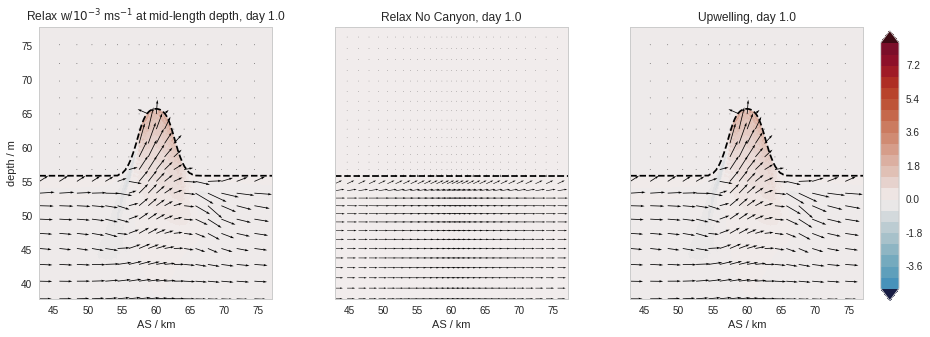

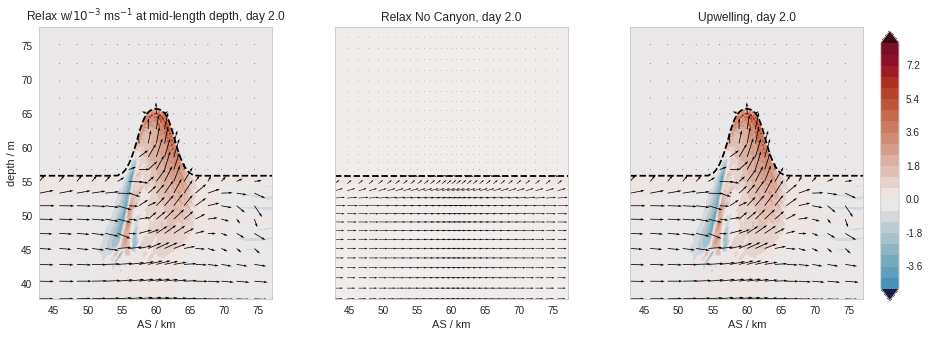

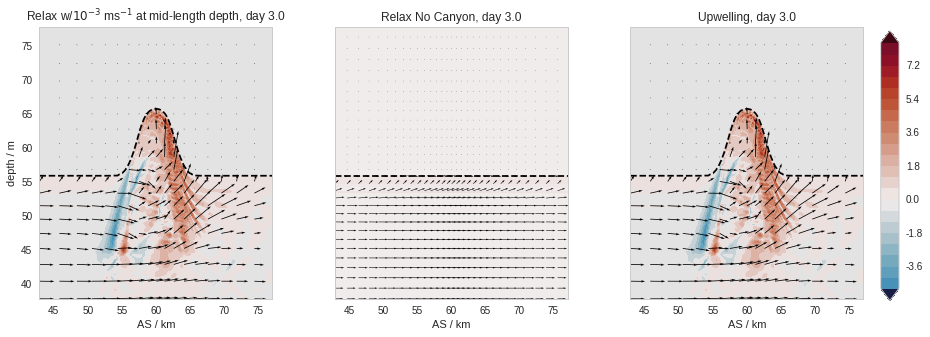

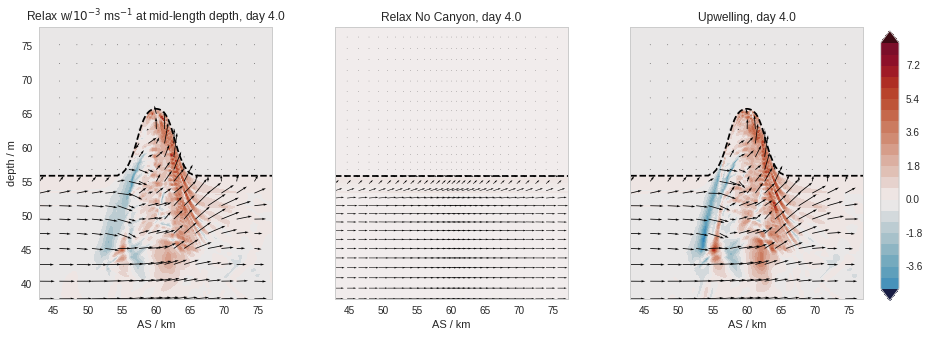

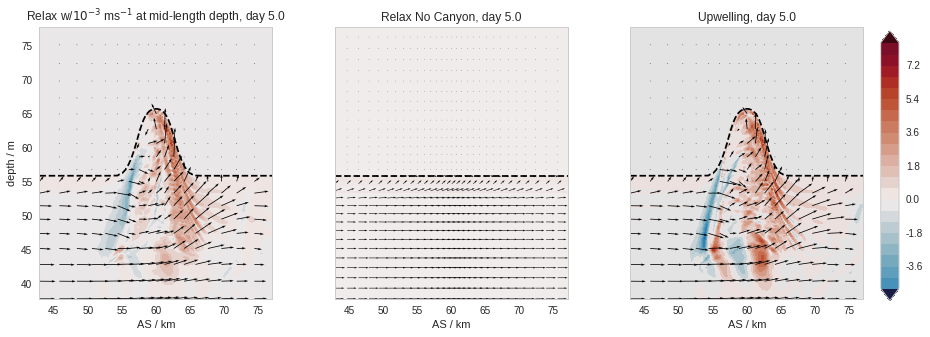

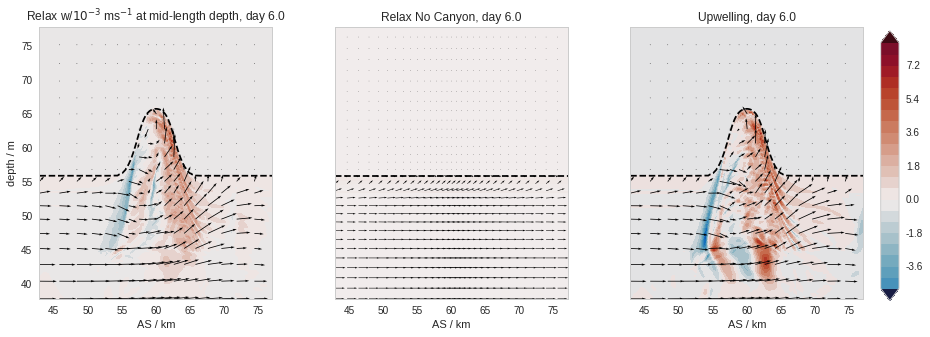

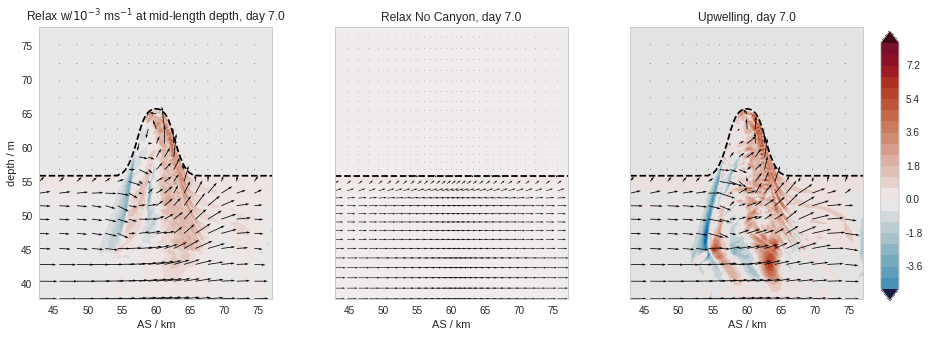

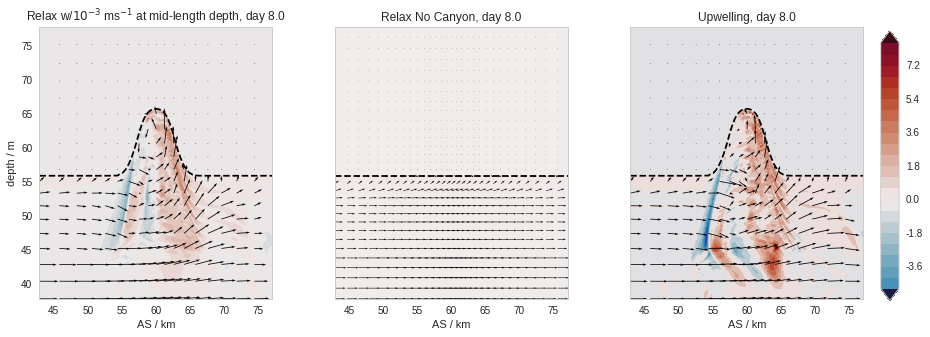

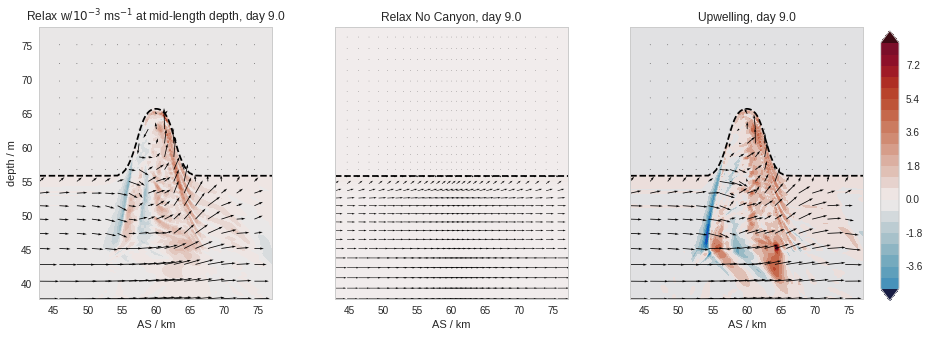

In [17]:
zind_Ast = 25
zind_NoC = 25
zind_Upw = 25

xslice = slice(90,270)
yslice = slice(100,280)

xslice_uns = slice(90,271)
yslice_uns = slice(100,281)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WNoC = stNoC.W.isel(T=tt,Zl=zind_NoC,Y=yslice,X=xslice)
    WUpw = stUpw.W.isel(T=tt,Zl=zind_Upw,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stNoC.U.isel(T=tt,Z=zind_NoC,Y=yslice,Xp1=xslice_uns)
    U3 = stUpw.U.isel(T=tt,Z=zind_Upw,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stNoC.V.isel(T=tt,Z=zind_NoC,Yp1=yslice_uns,X=xslice)
    V3 = stUpw.V.isel(T=tt,Z=zind_Upw,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UNoC,VNoC = rout.unstagger(U2,V2)
    UUpw,VUpw = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20,
                 cmap=cmo.cm.balance,vmin=-10, vmax=10)
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, WNoC*1E3,20,
                 cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,xslice],
                [gridNoC.Zl[zind_NoC]],colors='k')
    ax1.quiver(gridNoC.X[xslice][::6]/1000, gridNoC.Y[yslice][::6]/1000, UNoC[::6,::6], VNoC[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, WUpw*1E3,20,
                 cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax2.contour(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,xslice],
                [gridUpw.Zl[zind_Upw]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridUpw.X[xslice][::10]/1000, gridUpw.Y[yslice][::10]/1000, UUpw[::10,::10], VUpw[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Relax w/$10^{-3}$ ms$^{-1}$ at mid-length depth, day %1.1f' %(tt/2))
    ax1.set_title('Relax No Canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

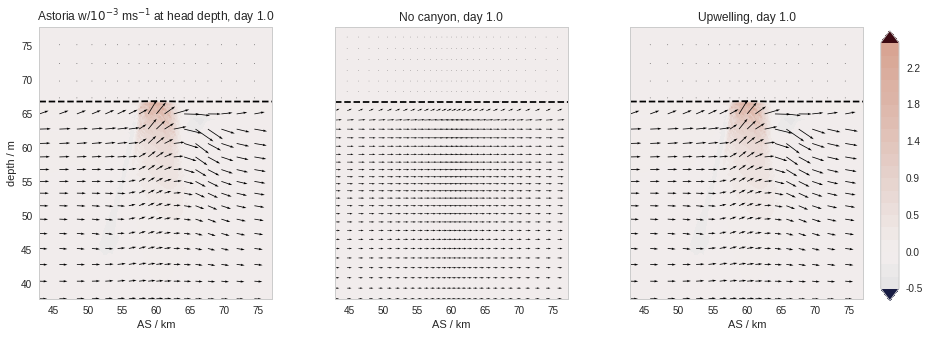

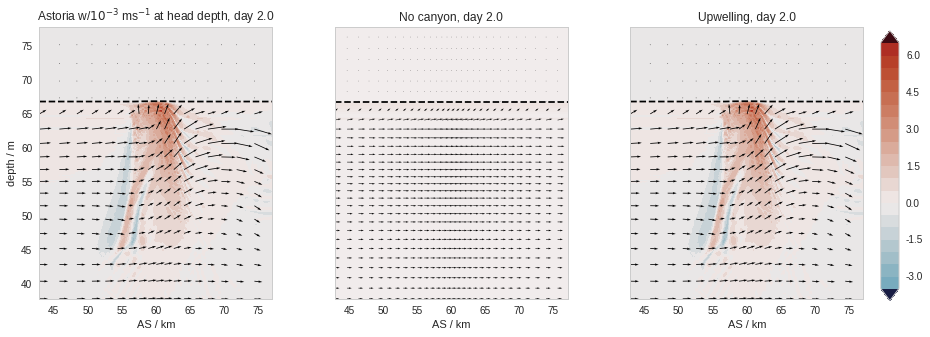

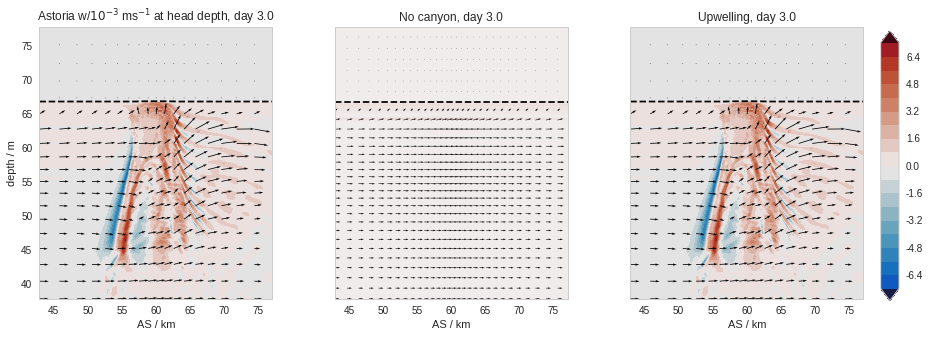

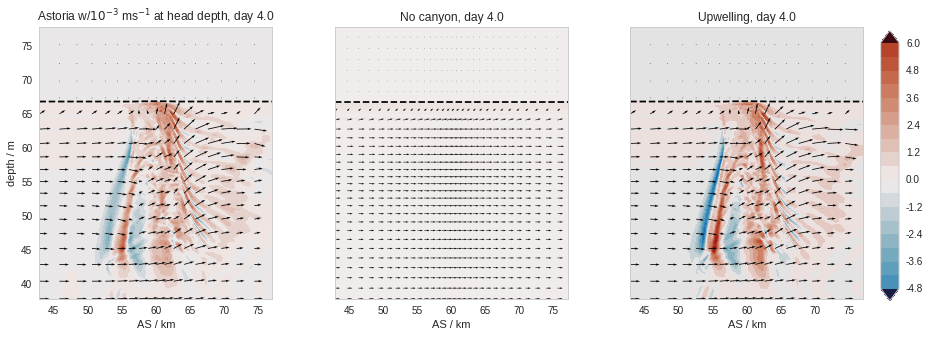

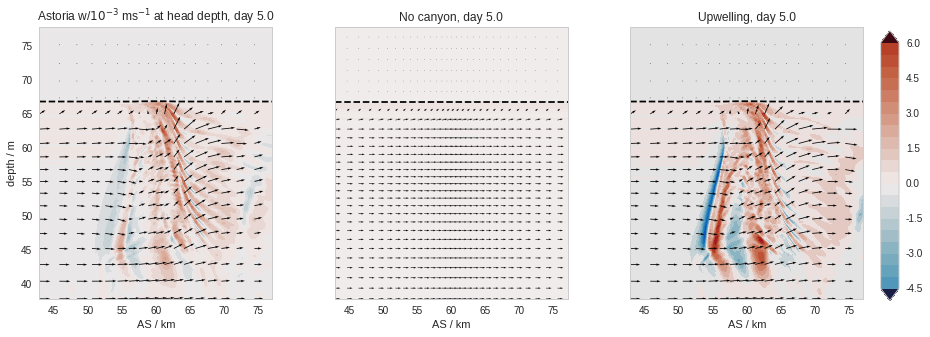

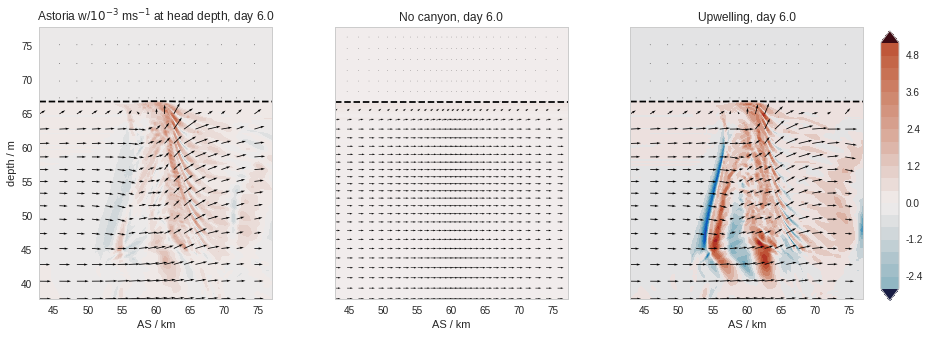

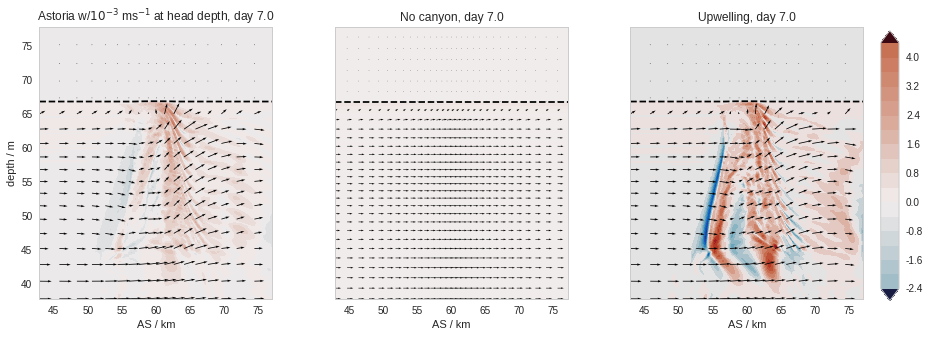

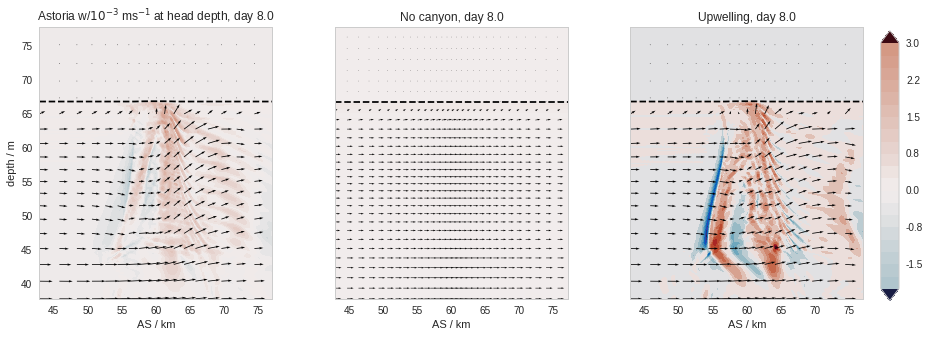

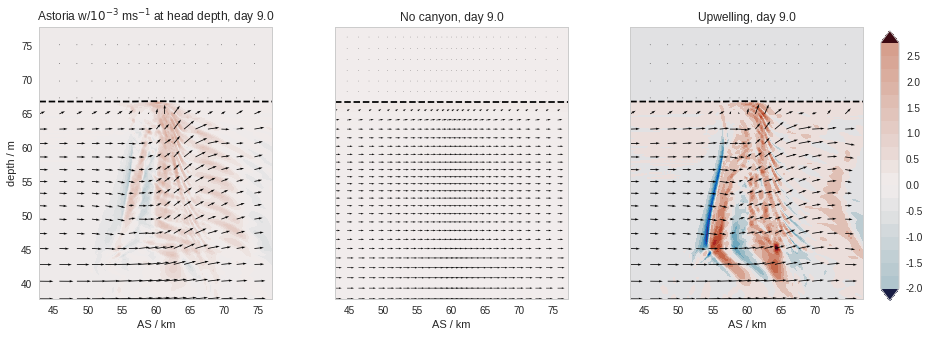

In [18]:
zind_Ast = 20
zind_NoC = 20
zind_Upw = 20

xslice = slice(90,270)
yslice = slice(100,280)

xslice_uns = slice(90,271)
yslice_uns = slice(100,281)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WNoC = stNoC.W.isel(T=tt,Zl=zind_NoC,Y=yslice,X=xslice)
    WUpw = stUpw.W.isel(T=tt,Zl=zind_Upw,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stNoC.U.isel(T=tt,Z=zind_NoC,Y=yslice,Xp1=xslice_uns)
    U3 = stUpw.U.isel(T=tt,Z=zind_Upw,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stNoC.V.isel(T=tt,Z=zind_NoC,Yp1=yslice_uns,X=xslice)
    V3 = stUpw.V.isel(T=tt,Z=zind_Upw,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UNoC,VNoC = rout.unstagger(U2,V2)
    UUpw,VUpw = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                        cmap=cmo.cm.balance,vmin=-10, vmax=10, extend='both')
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, WNoC*1E3,20, 
                 cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,xslice],
                [gridNoC.Zl[zind_NoC]],colors='k')
    ax1.quiver(gridNoC.X[xslice][::6]/1000, gridNoC.Y[yslice][::6]/1000, UNoC[::6,::6], VNoC[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, WUpw*1E3,20, cmap=cmo.cm.balance, vmin=-10, vmax=10)
    ax2.contour(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,xslice],
                [gridUpw.Zl[zind_Upw]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridUpw.X[xslice][::10]/1000, gridUpw.Y[yslice][::10]/1000, UUpw[::10,::10], VUpw[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at head depth, day %1.1f' %(tt/2))
    ax1.set_title('No canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

In [ ]:
zind_Ast = 1
zind_NoC = 1
zind_Upw = 1

xslice = slice(70,290)
yslice = slice(100,360)

xslice_uns = slice(70,291)
yslice_uns = slice(100,361)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WNoC = stNoC.W.isel(T=tt,Zl=zind_NoC,Y=yslice,X=xslice)
    WUpw = stUpw.W.isel(T=tt,Zl=zind_Upw,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stNoC.U.isel(T=tt,Z=zind_NoC,Y=yslice,Xp1=xslice_uns)
    U3 = stUpw.U.isel(T=tt,Z=zind_Upw,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stNoC.V.isel(T=tt,Z=zind_NoC,Yp1=yslice_uns,X=xslice)
    V3 = stUpw.V.isel(T=tt,Z=zind_Upw,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UNoC,VNoC = rout.unstagger(U2,V2)
    UUpw,VUpw = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                        cmap=cmo.cm.balance,vmin=-25, vmax=25)
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, WNoC*1E3,20,
                 cmap=cmo.cm.balance, vmin=-25, vmax=25)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridNoC.X[xslice]/1000, gridNoC.Y[yslice]/1000, -gridNoC.Depth[yslice,xslice],
                [gridNoC.Zl[zind_NoC]],colors='k')
    ax1.quiver(gridNoC.X[xslice][::6]/1000, gridNoC.Y[yslice][::6]/1000, UNoC[::6,::6], VNoC[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, WUpw*1E3,20, 
                 cmap=cmo.cm.balance, vmin=-25, vmax=25)
    ax2.contour(gridUpw.X[xslice]/1000, gridUpw.Y[yslice]/1000, -gridUpw.Depth[yslice,xslice],
                [gridUpw.Zl[zind_Upw]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridUpw.X[xslice][::10]/1000, gridUpw.Y[yslice][::10]/1000, UUpw[::10,::10], VUpw[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10{-3}$ ms$^{-1}$ at 5m, day %1.1f' %(tt/2))
    ax1.set_title('No Canyon, day %1.1f' %(tt/2))
    ax2.set_title('Upwelling, day %1.1f' %(tt/2))

/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


### How much water upwells through each canyon?

In [31]:
f_Ast = ('/data/kramosmu/results/TracerExperiments/REV_10TR_BF2_AST/HCW_TrMass_Tr01_REV_10TR_BF2_AST_01.csv')
f_NoC = ('/data/kramosmu/results/TracerExperiments/DNW_10TR_BF2_AST/HCW_TrMass_Tr01_DNW_10TR_BF2_AST_02.csv')
f_Upw = ('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/HCW_TrMass_Tr01_UPW_10TR_BF2_AST_01.csv')

df_Ast = pd.read_csv(f_Ast)
HCW_Ast = df_Ast['HCW']

df_NoC = pd.read_csv(f_NoC)
HCW_NoC = df_NoC['HCW']

df_Upw = pd.read_csv(f_Upw)
HCW_Upw = df_Upw['HCW']

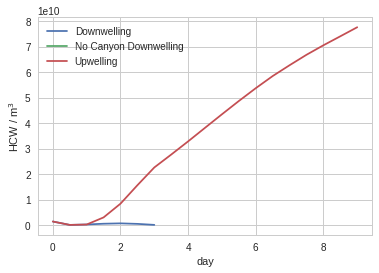

In [33]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2, HCW_Ast, label='Downwelling')
ax.plot(np.arange(19)/2, HCW_NoC, label='No Canyon Downwelling')
ax.plot(np.arange(19)/2, HCW_Upw, label='Upwelling')

ax.set_ylabel('HCW / m$^3$')
ax.set_xlabel('day')

ax.legend(loc=0)

Obviously, there is no tracer on shelf for the downwelling cases. Or could it be on the other side?